# 大作业-2-数据降维

## 导入库

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
color = sns.color_palette()


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
import joblib

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## 数据导入

In [38]:

df = pd.read_csv('abalone_1.csv')
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [39]:
df['age'].value_counts()

age
1    2591
0     838
2     529
Name: count, dtype: int64

In [40]:
X = df.drop(['age'], axis = 1)
y = df['age']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## pca可视化

In [42]:
column_names=['PC 1', 'PC 2']
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)
print("降维后的各主成分方差的贡献率:", pca.explained_variance_ratio_)
print("降维后的各主成分的方差值:\n", pca.explained_variance_)
print("降维后的累计贡献率:", pca.explained_variance_ratio_.sum())
X_pca = pd.DataFrame(data=data_pca, columns=column_names)

降维后的各主成分方差的贡献率: [0.92934748 0.02839208]
降维后的各主成分的方差值:
 [6.50707638 0.19879478]
降维后的累计贡献率: 0.9577395573918303


In [43]:
df_pca = pd.concat([X_pca, y], axis=1)
df_pca.to_csv('data_pca.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'data_pca.csv'

Chart size: [6.4 4.8]


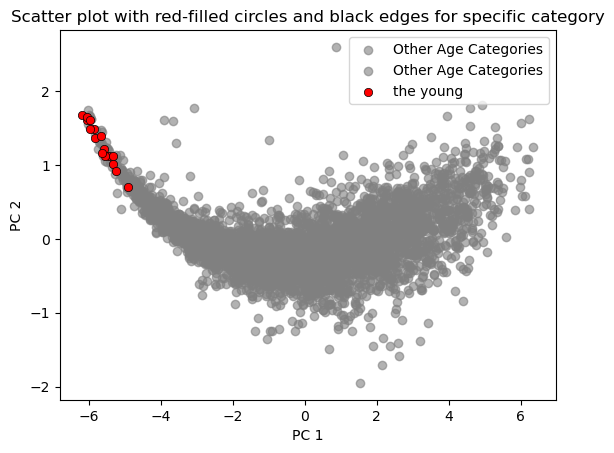

In [ ]:
for category in df_pca['age'].unique():
    if category != 0:
        subset = df_pca[df_pca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_pca[df_pca['age'] == 0]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='red',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the young',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

fig = plt.gcf()  # 获取当前figure
print("Chart size:", fig.get_size_inches())  # 打印图表尺寸（英寸）

plt.title('Scatter plot with red-filled circles and black edges for specific category')
plt.show()

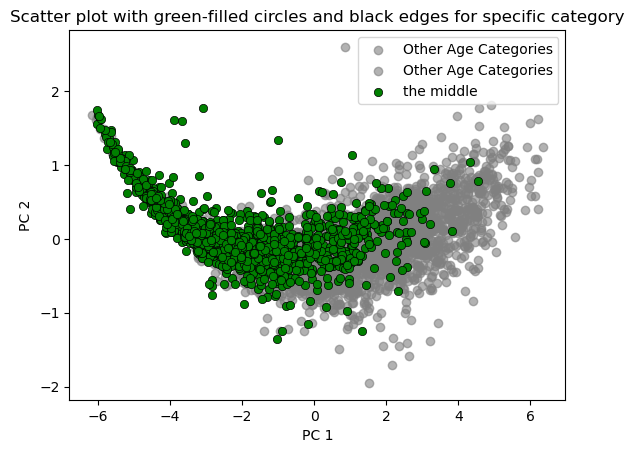

In [ ]:
for category in df_pca['age'].unique():
    if category != 1:
        subset = df_pca[df_pca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_pca[df_pca['age'] == 1]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='green',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the middle',
            zorder=2)  

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

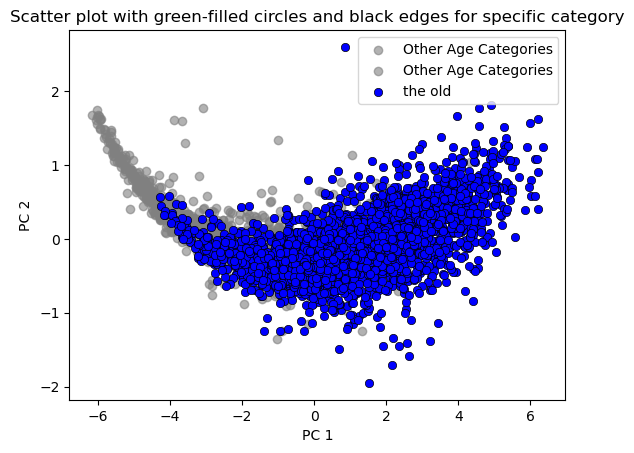

In [ ]:

for category in df_pca['age'].unique():
    if category != 2:
        subset = df_pca[df_pca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_pca[df_pca['age'] == 2]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='blue',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the old',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

## kpca可视化

In [ ]:
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=1, coef0=10)#coef0是sigmoid函数的偏置项，影响函数形状。
#kpca = KernelPCA(n_components=2, kernel='poly', degree=6, gamma=1)
#kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
data_kpca = kpca.fit_transform(X_scaled)
X_kpca = pd.DataFrame(data=data_kpca, columns=column_names)

df_kpca = pd.concat([X_kpca, y], axis=1)
df_kpca.to_csv('data_kpca.csv', index=False)

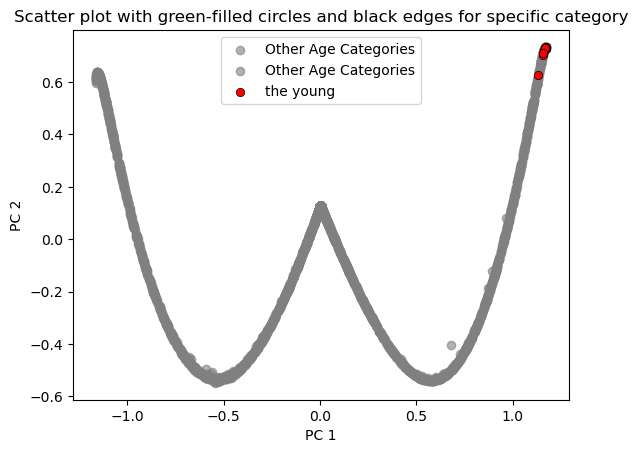

In [ ]:
for category in df_kpca['age'].unique():
    if category != 0:
        subset = df_kpca[df_kpca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_kpca[df_kpca['age'] == 0]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='red',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the young',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

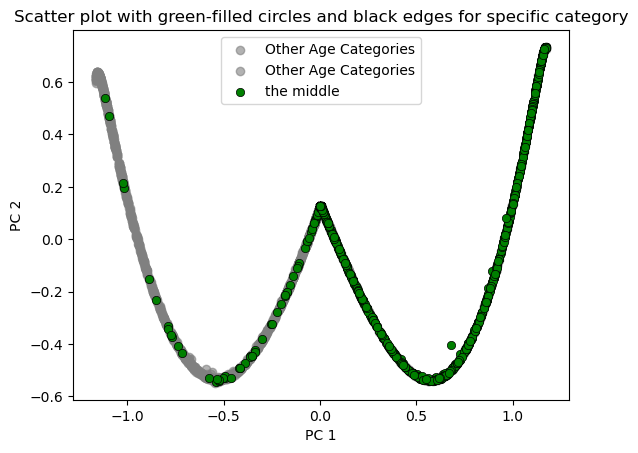

In [ ]:
for category in df_kpca['age'].unique():
    if category != 1:
        subset = df_kpca[df_kpca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_kpca[df_kpca['age'] == 1]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='green',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the middle',
            zorder=2)  

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

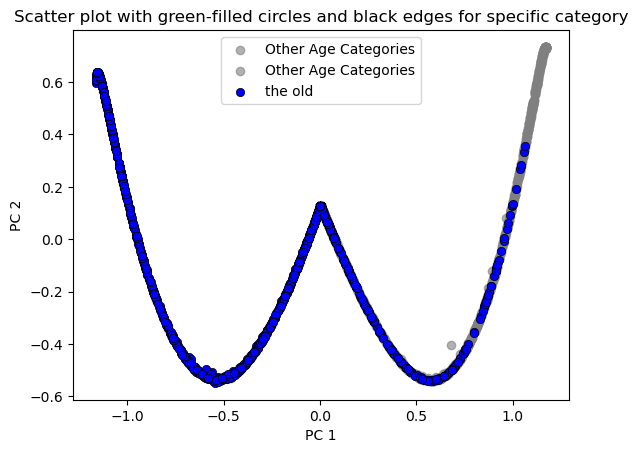

In [ ]:

for category in df_kpca['age'].unique():
    if category != 2:
        subset = df_kpca[df_kpca['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_kpca[df_kpca['age'] == 2]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='blue',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the old',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

## lda可视化

In [ ]:
lda_model = LDA()

X_lda = lda_model.fit_transform(X_scaled, y)
X_lda = pd.DataFrame(data=X_lda, columns=column_names)
print("降维后的LDA的解释方差比:", lda_model.explained_variance_ratio_)

df_lda = pd.concat([X_lda, y], axis=1)
df_lda.to_csv('data_lda.csv', index=False)
print("降维后的LDA的解释方差比:", lda_model.explained_variance_ratio_)

降维后的LDA的解释方差比: [0.9420585 0.0579415]
降维后的LDA的解释方差比: [0.9420585 0.0579415]


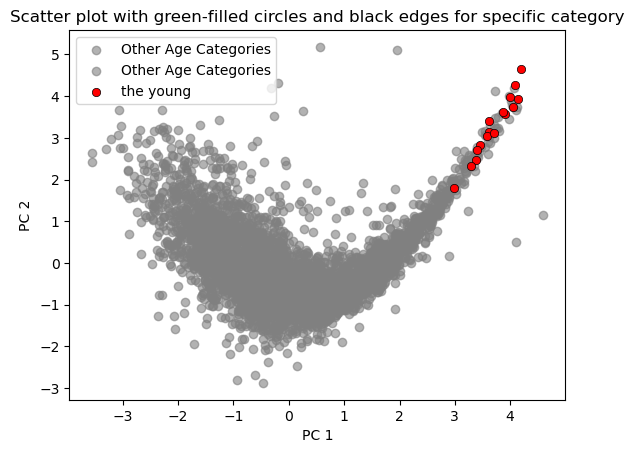

In [ ]:
for category in df_lda['age'].unique():
    if category != 0:
        subset = df_lda[df_lda['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_lda[df_lda['age'] == 0]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='red',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the young',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

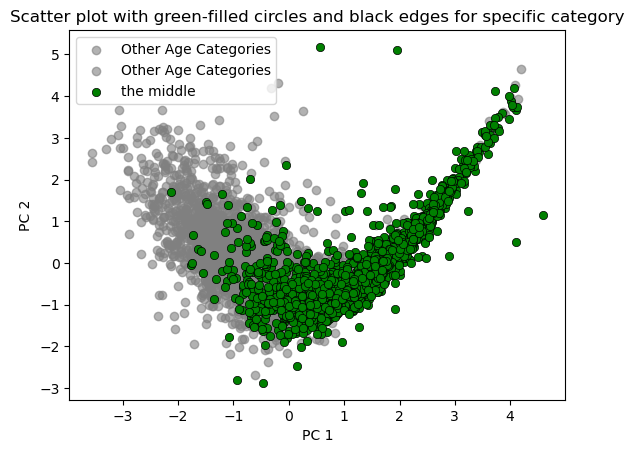

In [ ]:
for category in df_lda['age'].unique():
    if category != 1:
        subset = df_lda[df_lda['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_lda[df_lda['age'] == 1]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='green',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the middle',
            zorder=2)  

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()

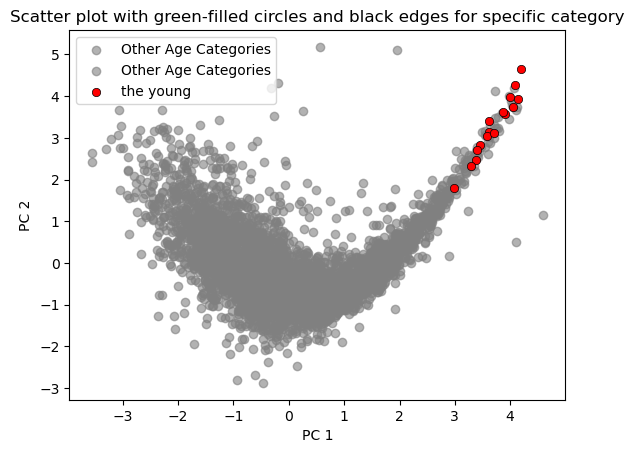

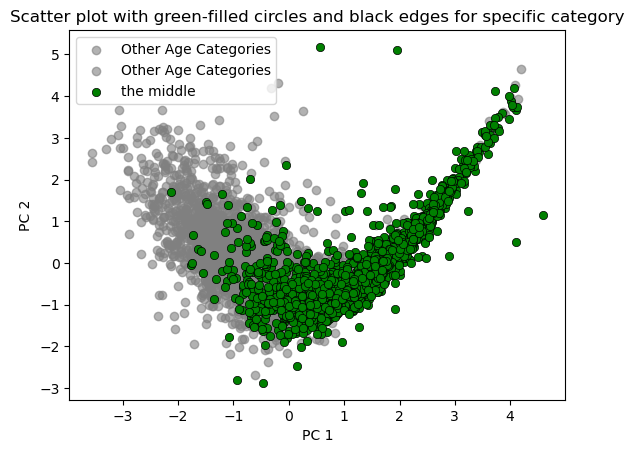

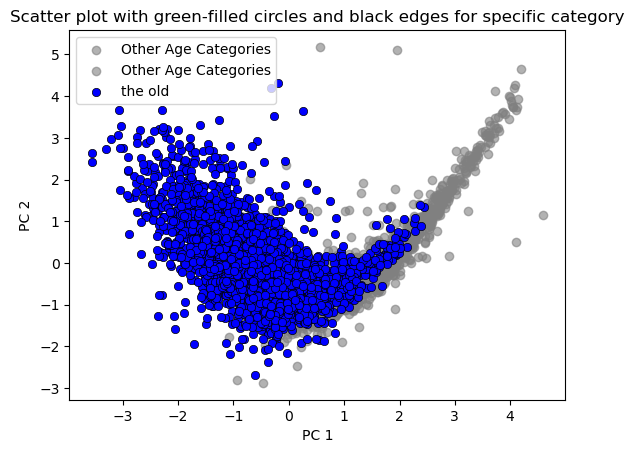

In [ ]:
for category in df_lda['age'].unique():
    if category != 0:
        subset = df_lda[df_lda['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_lda[df_lda['age'] == 0]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='red',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the young',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()
for category in df_lda['age'].unique():
    if category != 1:
        subset = df_lda[df_lda['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_lda[df_lda['age'] == 1]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='green',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the middle',
            zorder=2)  

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()
for category in df_lda['age'].unique():
    if category != 2:
        subset = df_lda[df_lda['age'] == category]
        plt.scatter(subset['PC 1'], subset['PC 2'], 
                   c='gray', 
                   alpha=0.6, 
                   label='Other Age Categories',
                   zorder=1)  

subset_green = df_lda[df_lda['age'] == 2]
plt.scatter(subset_green['PC 1'], subset_green['PC 2'], 
            c='blue',  
            edgecolors='black',  
            linewidth=0.5,  
            alpha=1.0,  
            label='the old',
            zorder=2)

plt.legend()

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Scatter plot with green-filled circles and black edges for specific category')
plt.show()